In [9]:
!pip install pymatgen crystal-toolkit

In [25]:
import os
import ase.io
import matplotlib.pyplot as plt

In [26]:
directory_path = '../datasets'
files = [
    'mp-1185770.extxyz', 'mp-1200374.extxyz', 'mp-1227289.extxyz',
    'mp-1233512.extxyz', 'mp-605752.extxyz', 'mp-685608.extxyz', 'mp-757666.extxyz'
]

In [27]:
for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    atoms_list = ase.io.read(file_path, index=':')
    num_configs = len(atoms_list)
    print(f"File: {file_name}, Number of configurations: {num_configs}")

File: mp-1185770.extxyz, Number of configurations: 5
File: mp-1200374.extxyz, Number of configurations: 14
File: mp-1227289.extxyz, Number of configurations: 8
File: mp-1233512.extxyz, Number of configurations: 25
File: mp-605752.extxyz, Number of configurations: 18
File: mp-685608.extxyz, Number of configurations: 21
File: mp-757666.extxyz, Number of configurations: 6


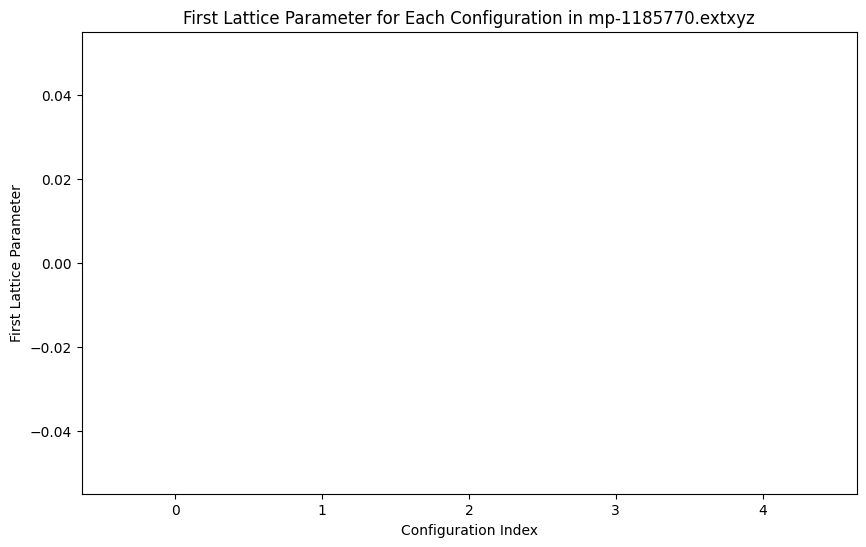

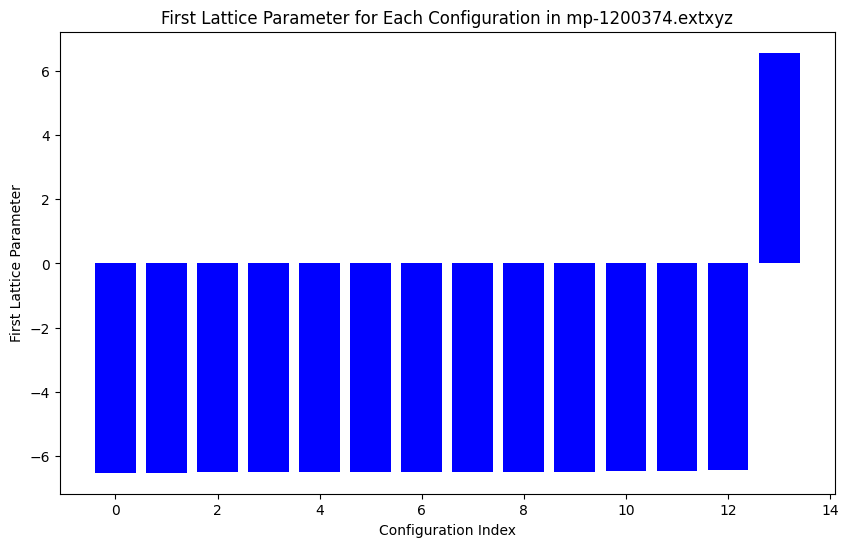

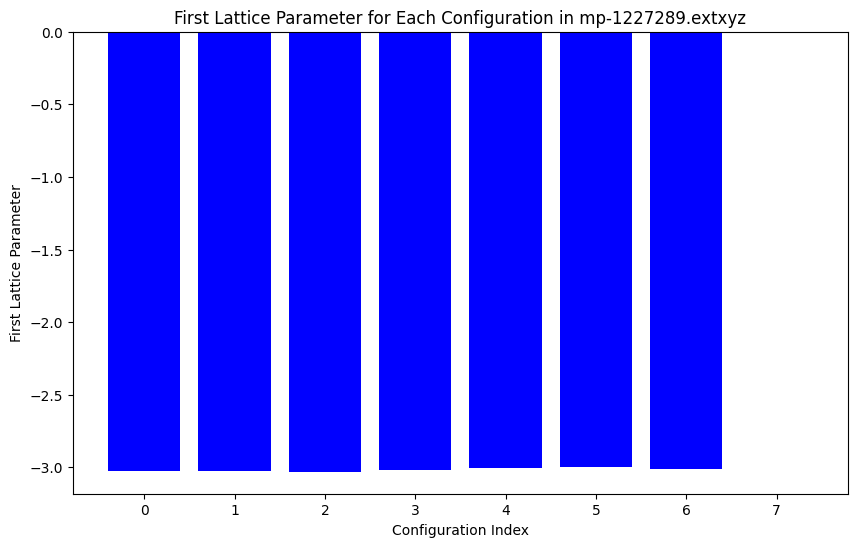

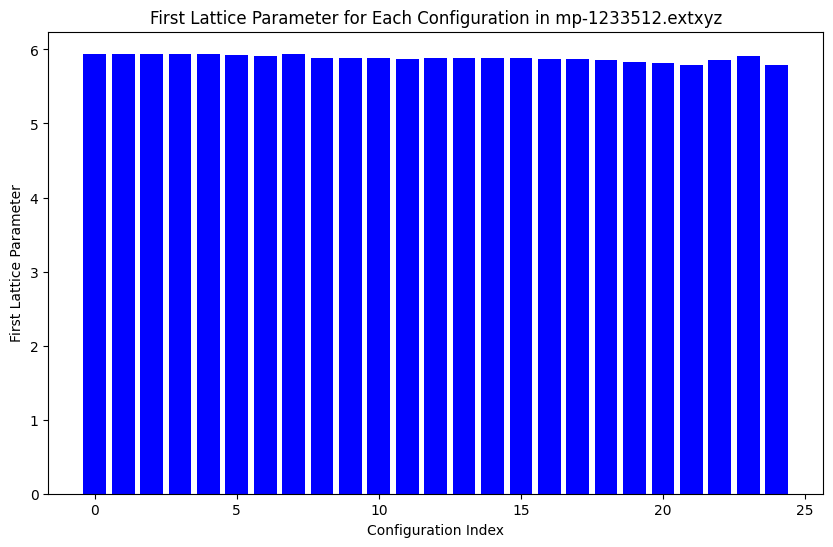

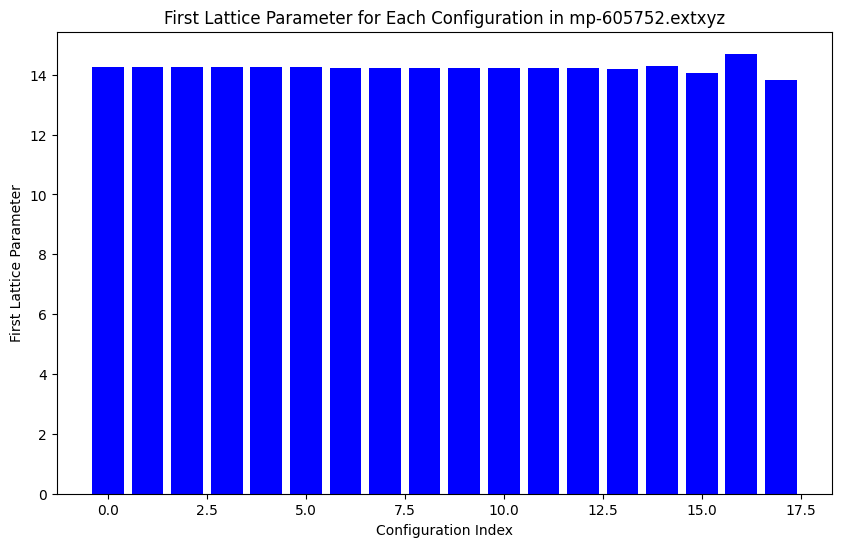

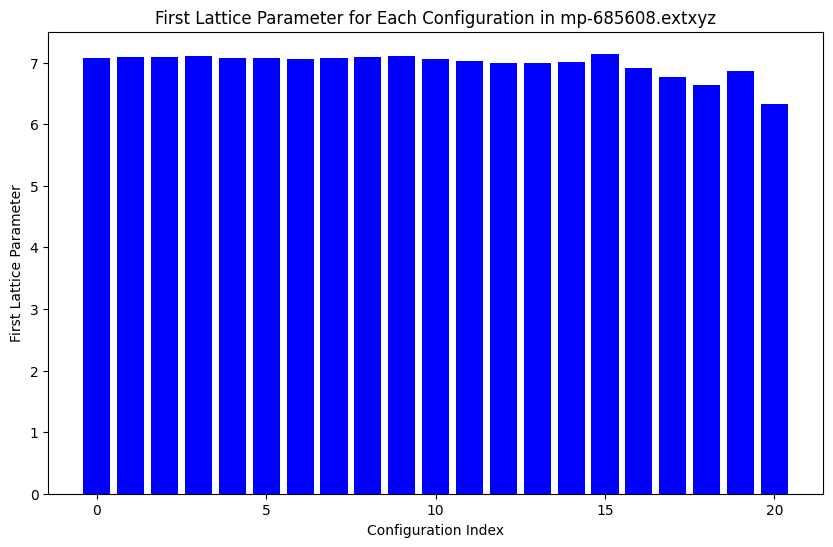

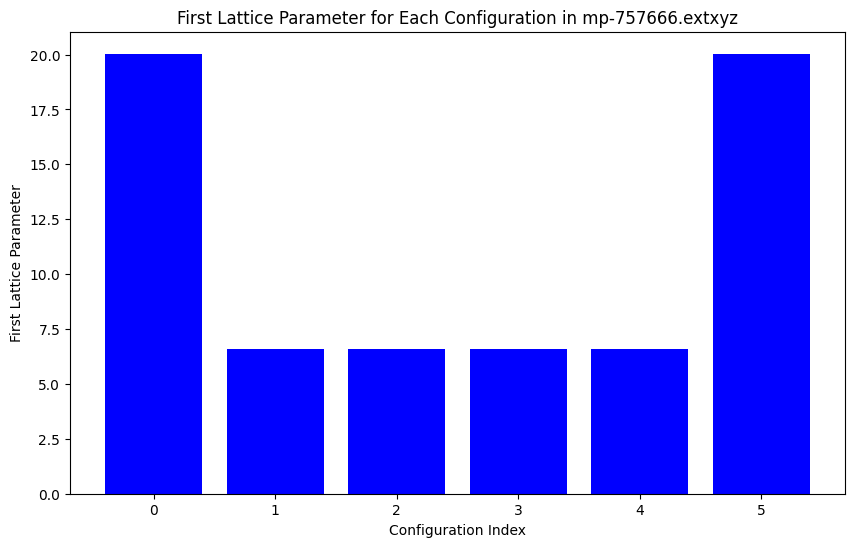

In [28]:
for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    atoms_list = ase.io.read(file_path, index=':')
    first_lattice_params = [atoms.cell[0][0] for atoms in atoms_list]
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(first_lattice_params)), first_lattice_params, color='blue')
    plt.xlabel('Configuration Index')
    plt.ylabel('First Lattice Parameter')
    plt.title(f'First Lattice Parameter for Each Configuration in {file_name}')
    plt.show()

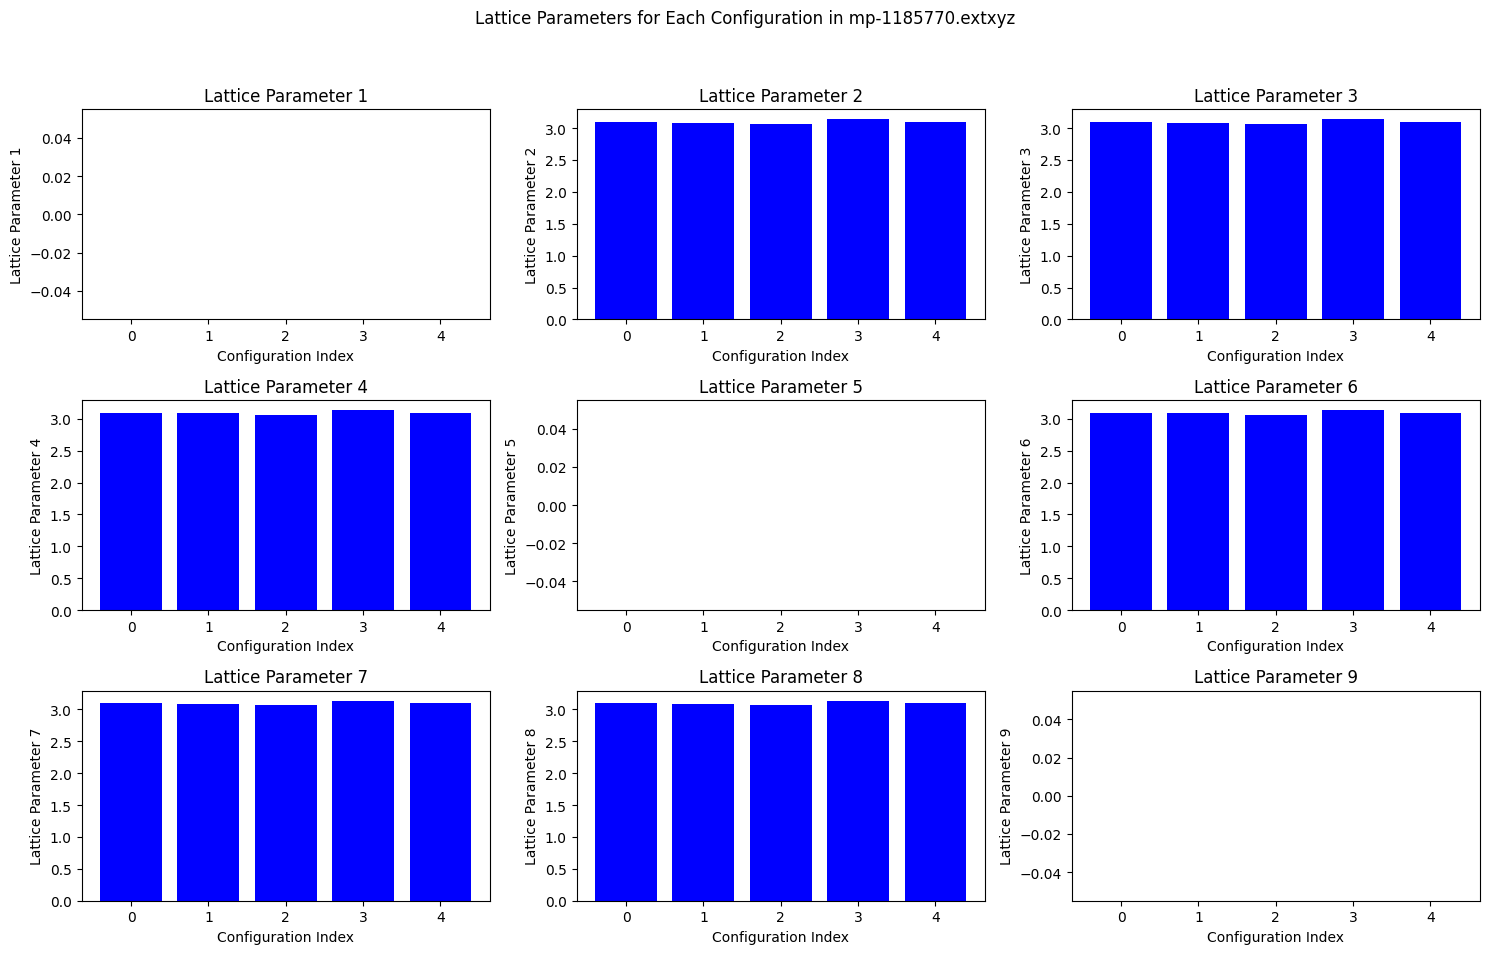

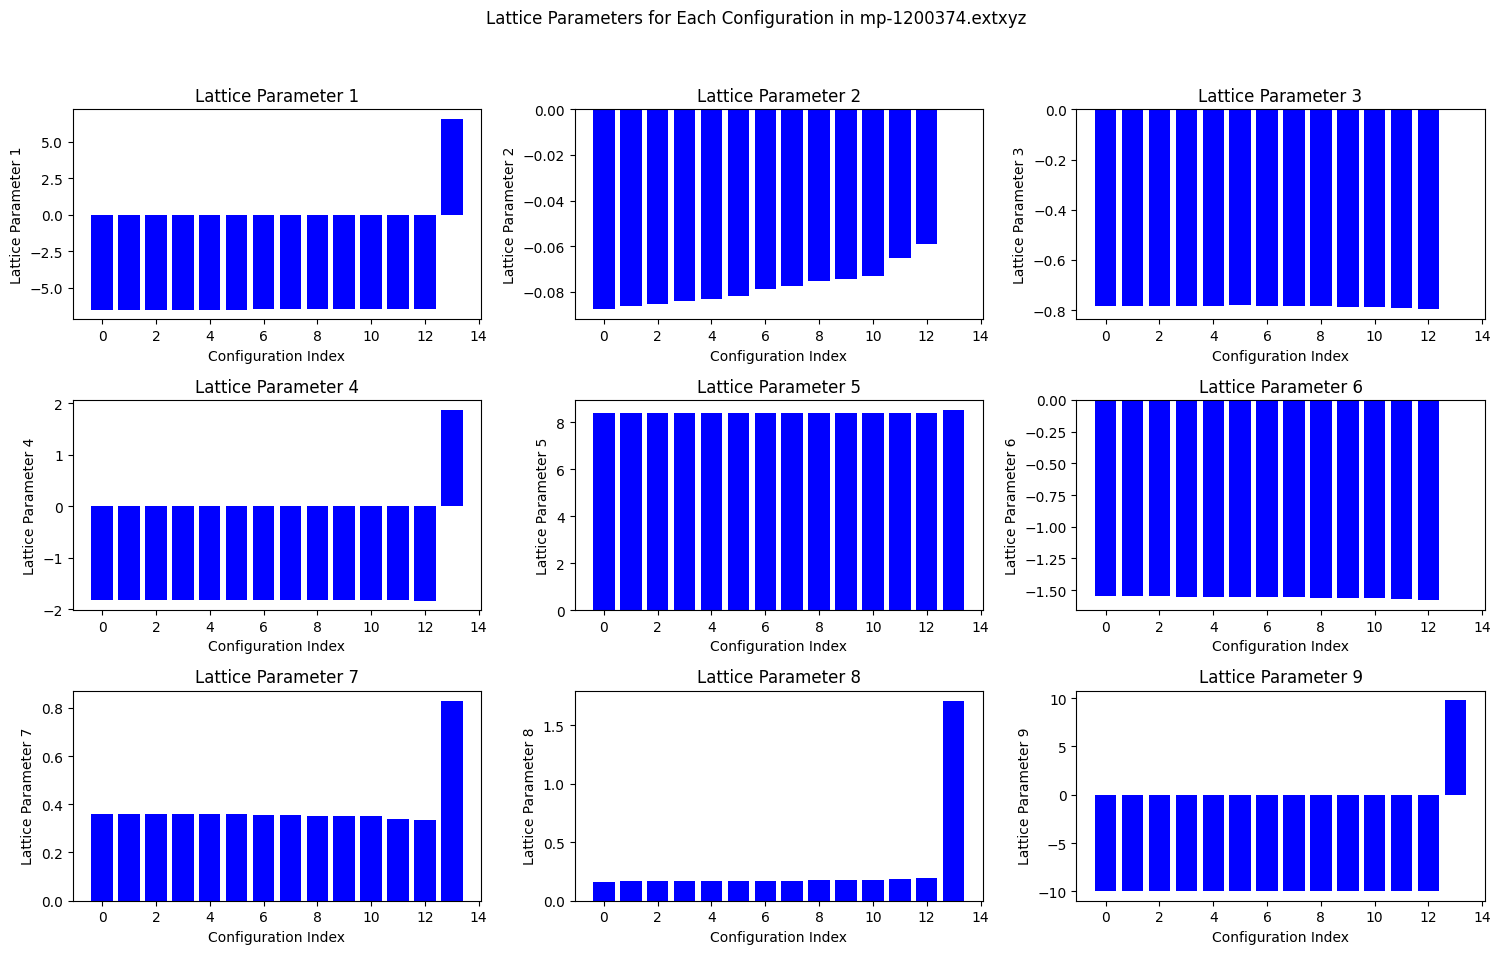

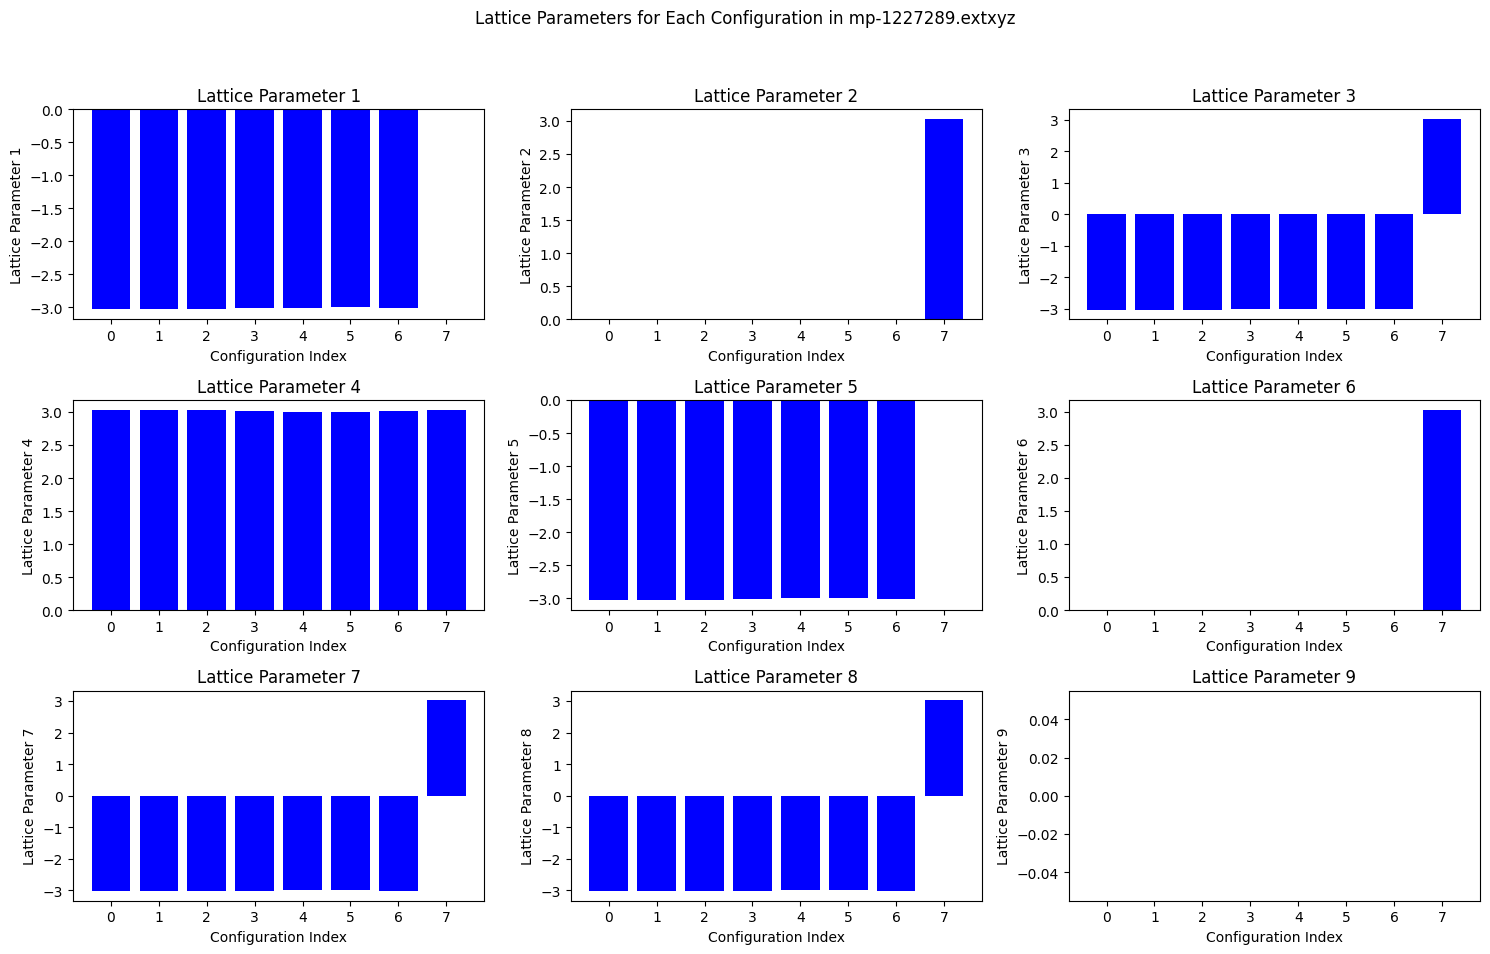

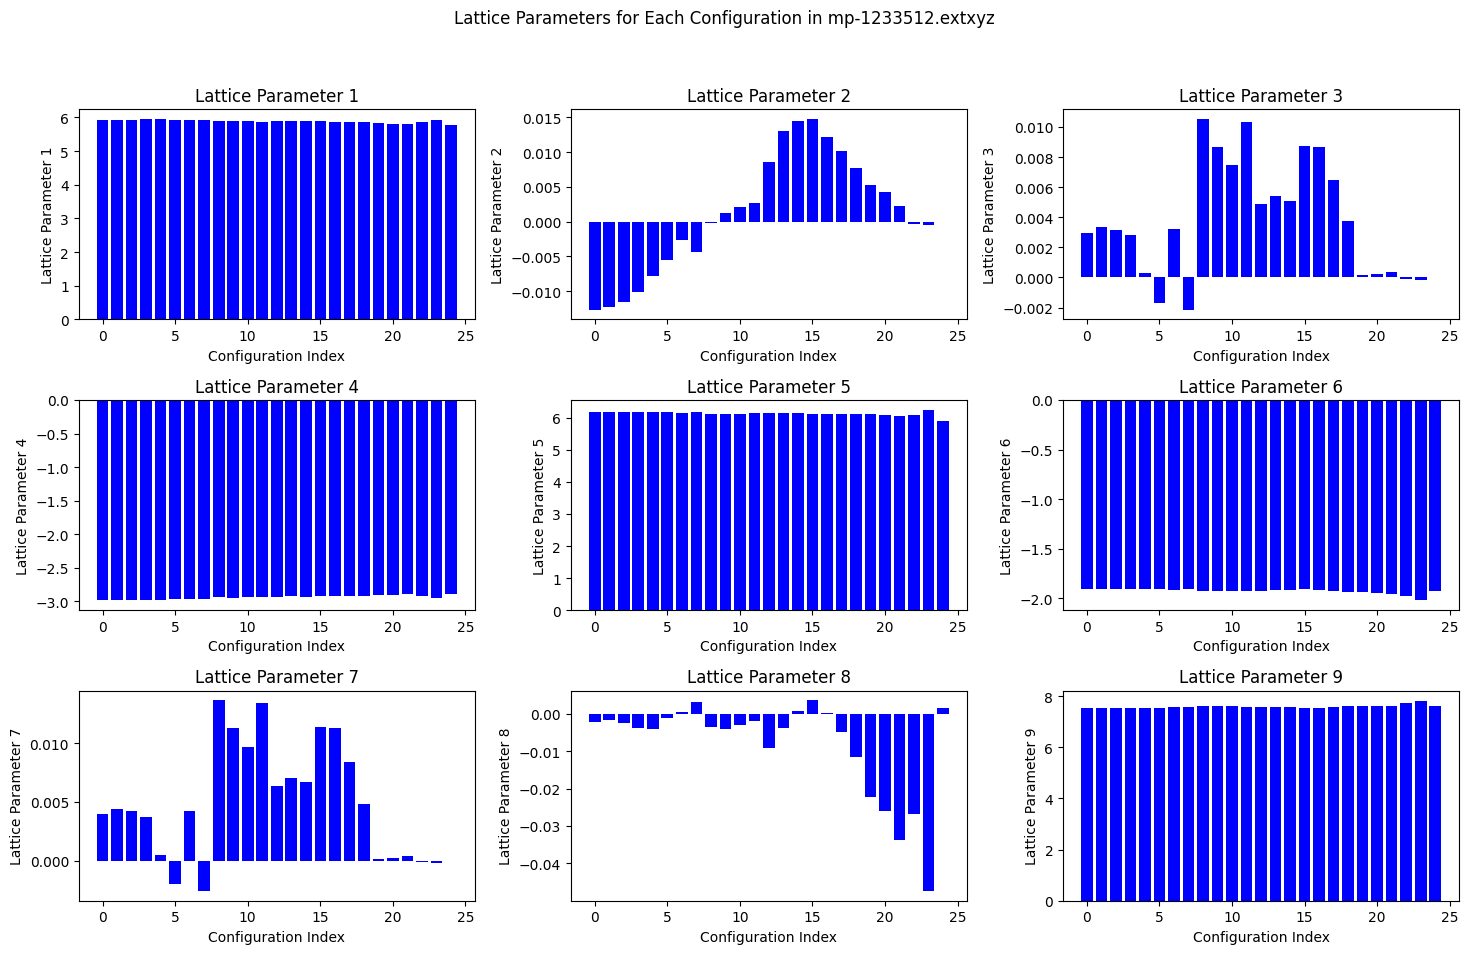

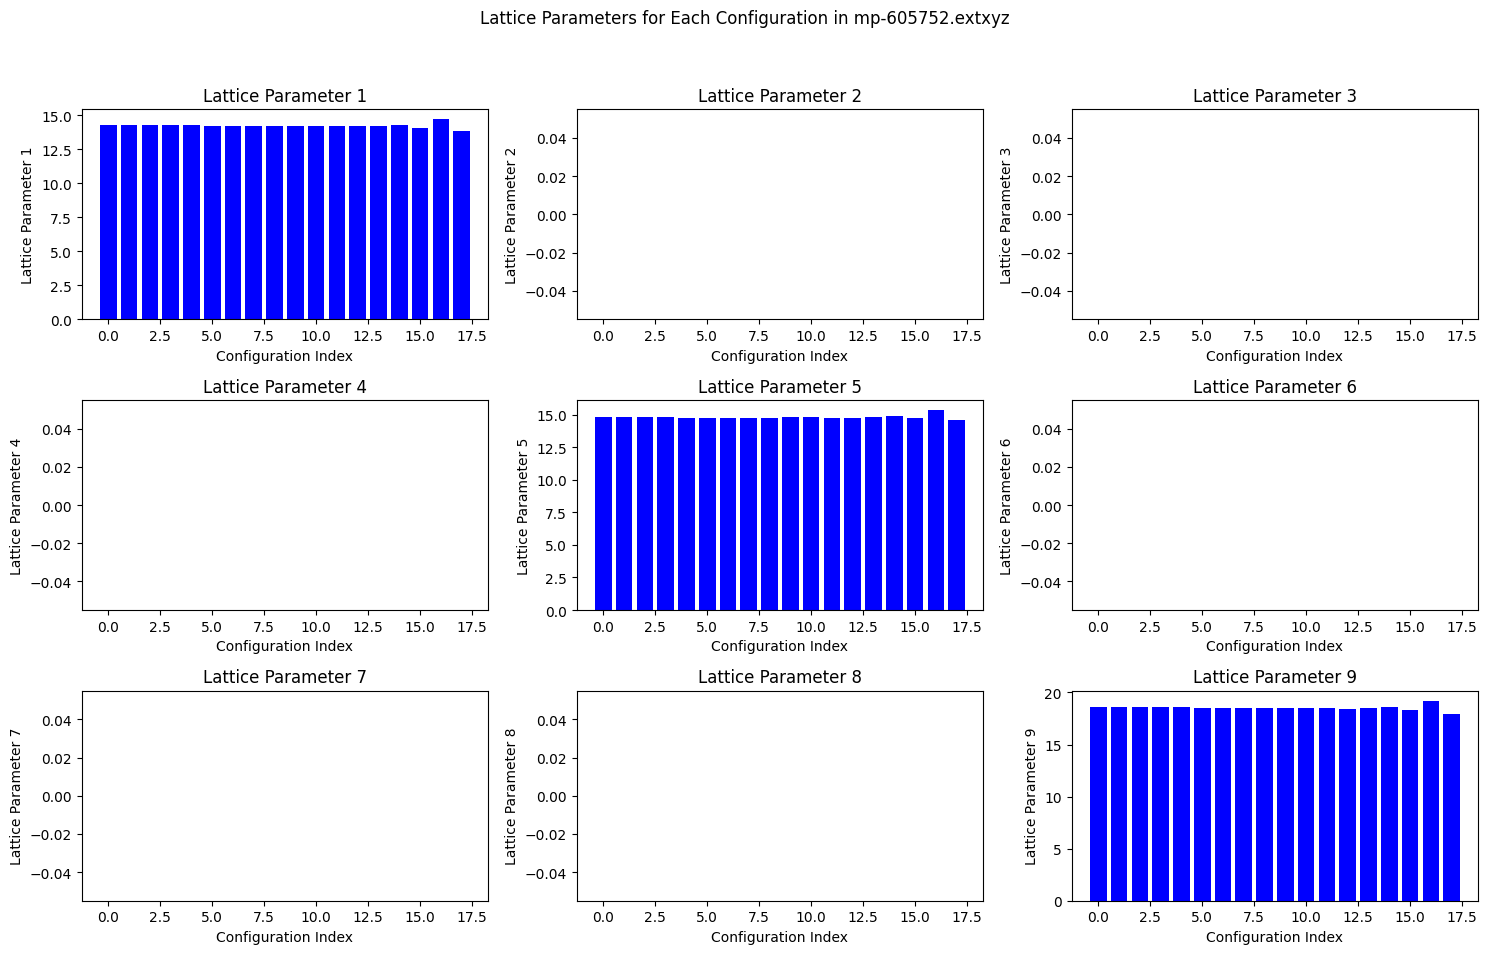

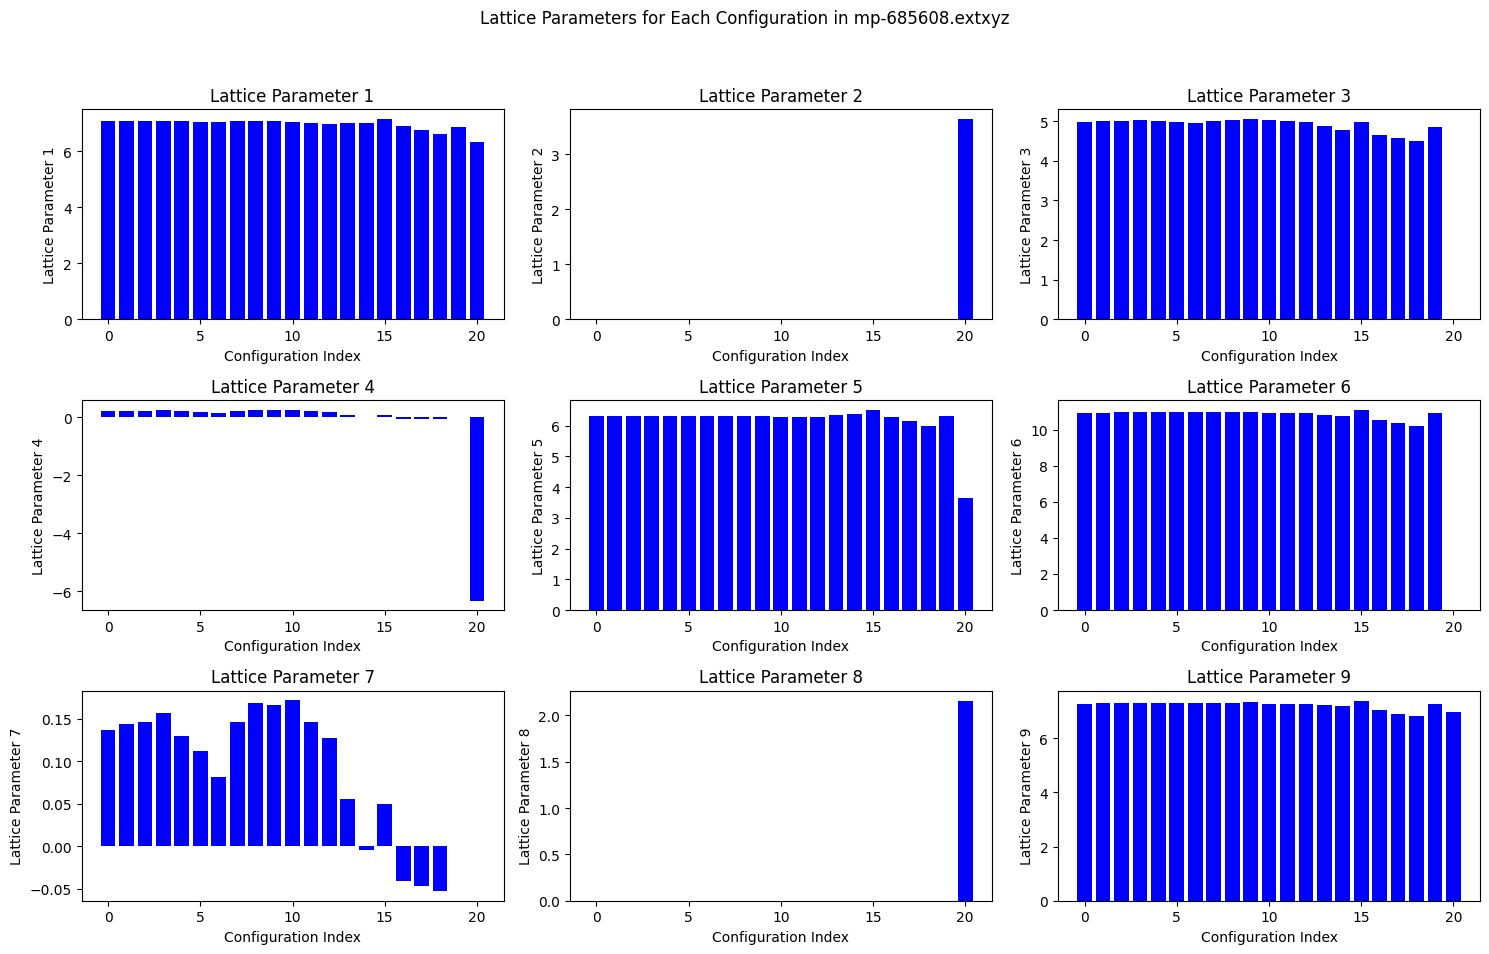

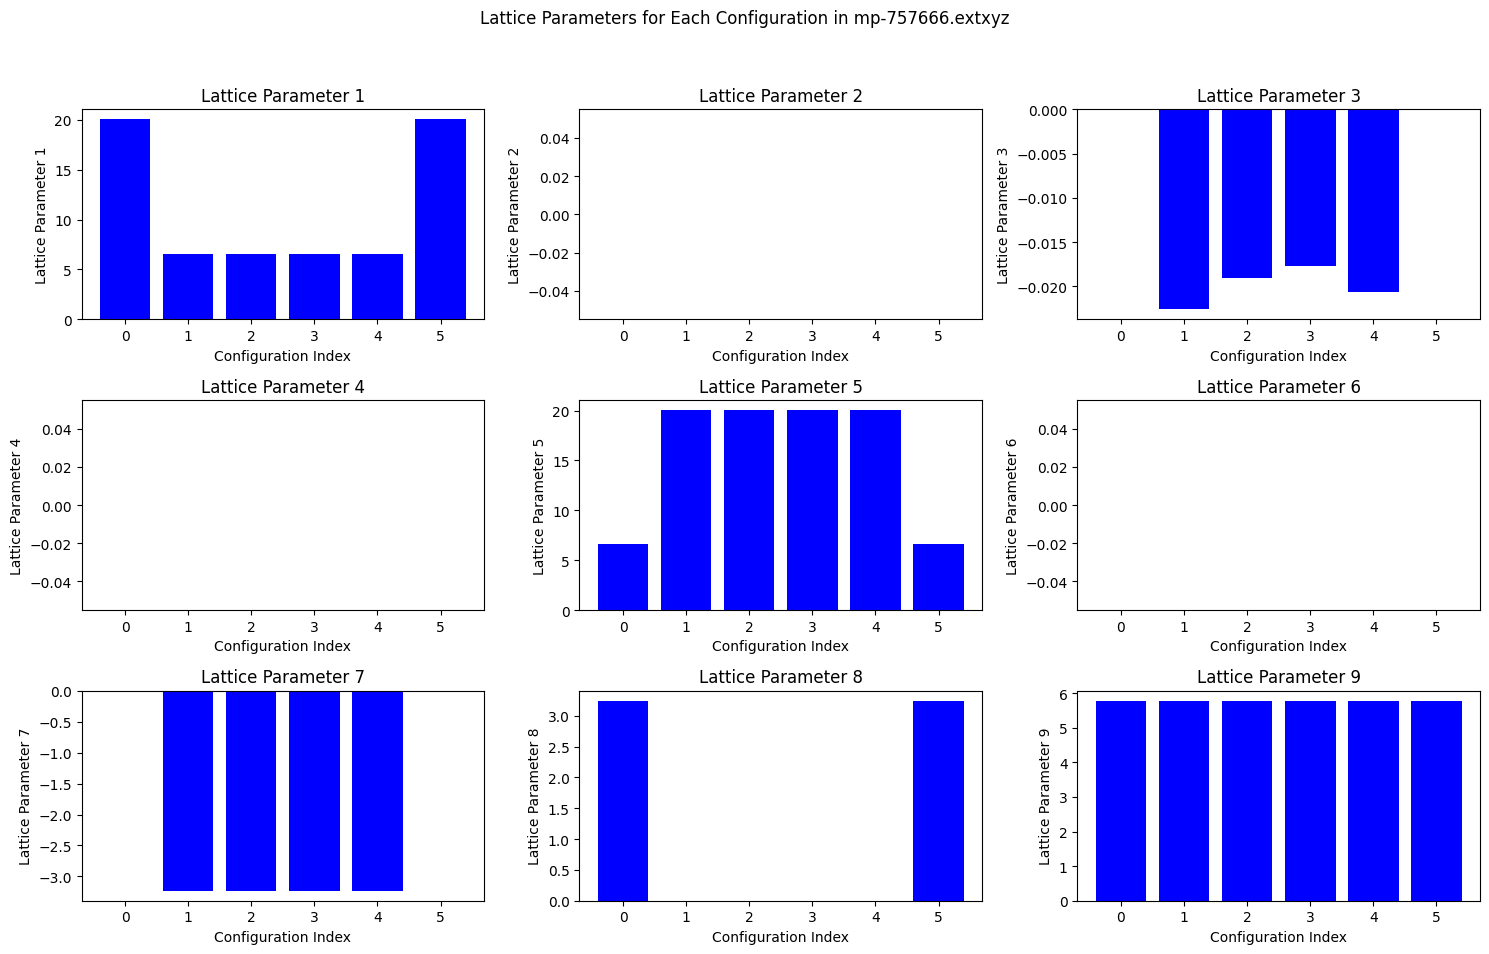

In [29]:
for file_name in files:
    file_path = os.path.join(directory_path, file_name)
    atoms_list = ase.io.read(file_path, index=':')
    
    # Extract all lattice parameters
    lattice_params = [atoms.cell.flatten() for atoms in atoms_list]
    
    # Convert to a transposed list to plot each lattice parameter
    lattice_params_transposed = list(map(list, zip(*lattice_params)))
    
    # Plotting the bar chart for each lattice parameter
    plt.figure(figsize=(15, 10))
    for i, params in enumerate(lattice_params_transposed):
        plt.subplot(3, 3, i+1)
        plt.bar(range(len(params)), params, color='blue')
        plt.xlabel('Configuration Index')
        plt.ylabel(f'Lattice Parameter {i+1}')
        plt.title(f'Lattice Parameter {i+1}')
    
    plt.suptitle(f'Lattice Parameters for Each Configuration in {file_name}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


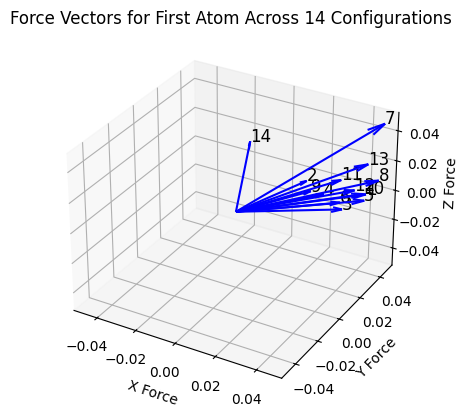

In [2]:
import ase.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot force vectors
def plot_force_vectors(force_vectors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot arrows for each force vector
    for i, force in enumerate(force_vectors):
        ax.quiver(0, 0, 0, force[0], force[1], force[2], length=np.linalg.norm(force), normalize=True, color='b', arrow_length_ratio=0.1)
        ax.text(force[0], force[1], force[2], f'{i+1}', size=12, zorder=1, color='k')

    ax.set_xlim([-0.05, 0.05])
    ax.set_ylim([-0.05, 0.05])
    ax.set_zlim([-0.05, 0.05])

    ax.set_xlabel('X Force')
    ax.set_ylabel('Y Force')
    ax.set_zlabel('Z Force')

    plt.title('Force Vectors for First Atom Across 14 Configurations')
    plt.show()

# Specify the full path to the file mp-1200374.extxyz
file_path = '../datasets/mp-1200374.extxyz'

# Read the file mp-1200374.extxyz
atoms_list = ase.io.read(file_path, index=':')

# Extract forces for the first atom in each configuration
forces_first_atom = [atoms.get_forces()[0] for atoms in atoms_list]

# Plot the force vectors
plot_force_vectors(forces_first_atom)

In [36]:
!pip install plotly

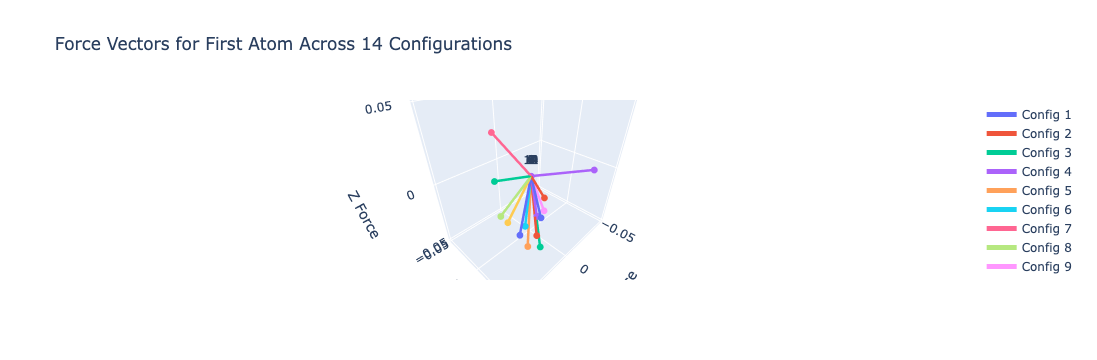

In [38]:
import ase.io
import numpy as np
import plotly.graph_objects as go

# Function to plot force vectors interactively with line arrows
def plot_force_vectors_interactive(force_vectors):
    fig = go.Figure()

    # Plot arrows for each force vector
    for i, force in enumerate(force_vectors):
        fig.add_trace(go.Scatter3d(
            x=[0, force[0]],
            y=[0, force[1]],
            z=[0, force[2]],
            mode='lines+markers+text',
            marker=dict(size=4),
            line=dict(width=5),
            text=[f'{i+1}'],
            textposition='top center',
            name=f'Config {i+1}'
        ))
    
    max_force = np.max(np.abs(force_vectors))
    fig.update_layout(
        scene=dict(
            xaxis=dict(range=[-max_force, max_force], title='X Force'),
            yaxis=dict(range=[-max_force, max_force], title='Y Force'),
            zaxis=dict(range=[-max_force, max_force], title='Z Force'),
        ),
        title='Force Vectors for First Atom Across 14 Configurations',
    )
    
    fig.show()

# Specify the full path to the file mp-1200374.extxyz
file_path = '../datasets/mp-1200374.extxyz'

# Read the file mp-1200374.extxyz
atoms_list = ase.io.read(file_path, index=':')

# Extract forces for the first atom in each configuration
forces_first_atom = [atoms.get_forces()[0] for atoms in atoms_list]

# Plot the force vectors interactively with line arrows
plot_force_vectors_interactive(forces_first_atom)
